## Proyecto 1 - Bicicletas compartidas (Modelamiento)
#### Juan David Rios 
#### Viviana Lara 202122798  
#### Catalina Gómez 202122560

In [1]:
import pandas as pd
data = pd.read_csv("../data/SeoulBikeData_limpio.csv")


### Modelo de regresión lineal 

$y = \beta_0 + \beta_1 \times \text{Hour} + \beta_2 \times \text{Temperature} + \beta_3 \times \text{Humidity} + \beta_4 \times \text{Wind speed} + \beta_5\times \text{Visibility} + \beta_6\times \text{Solar Radiation} + \beta_7\times \text{Seasons}$

In [2]:
from sklearn.model_selection import train_test_split
# Define las variables independientes y la variable dependiente
X = data[['Hour', 'Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Seasons']]
y = data['Rented Bike Count']

# Dividir el conjunto de datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [3]:
from sklearn.linear_model import LinearRegression

# crear el objeto del modelo
linreg = LinearRegression()

# ajustar los parámetros del modelo usando los datos de entrenamiento
linreg.fit(X_train, y_train)

LinearRegression()

In [4]:
# Evaluar el modelo
y_pred = linreg.predict(X_test)

In [5]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Evaluar el modelo con R^2 y RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R²: {r2}")
print(f"RMSE: {rmse}")

R²: 0.4616569060235538
RMSE: 471.6907148323566


### Modelo Forecasting ARIMA

In [14]:
data1 = pd.read_csv("../data/SeoulBikeData_limpio.csv", parse_dates=["Date"])
data1 = data1.sort_values(by=["Date","Hour"], ascending=True)
data1.set_index('Date', inplace=True)
data1.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Seasons
Date,,,,,,,,
2017-12-01,254,0,-5.2,37,2.2,2000,0.0,3
2017-12-01,204,1,-5.5,38,0.8,2000,0.0,3
2017-12-01,173,2,-6.0,39,1.0,2000,0.0,3
2017-12-01,107,3,-6.2,40,0.9,2000,0.0,3
2017-12-01,78,4,-6.0,36,2.3,2000,0.0,3


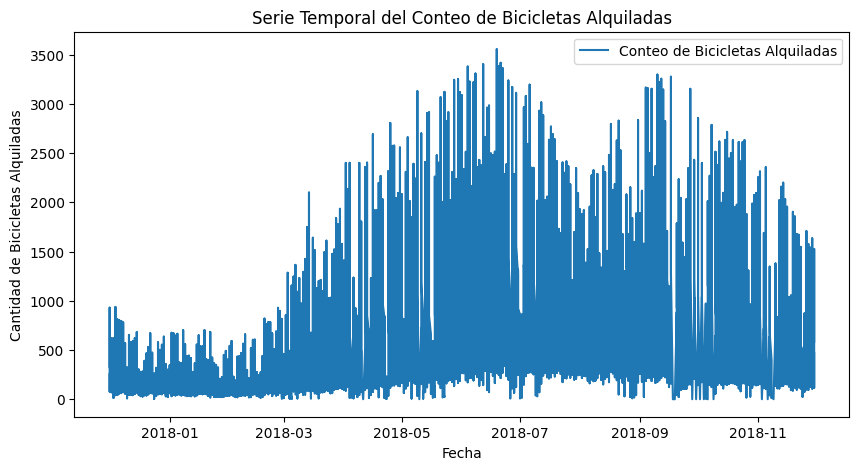

In [15]:
import matplotlib.pyplot as plt

var_resp = data1["Rented Bike Count"]
# Visualizar la serie temporal
plt.figure(figsize=(10, 5))
plt.plot(var_resp.index, var_resp, label='Conteo de Bicicletas Alquiladas')
plt.title('Serie Temporal del Conteo de Bicicletas Alquiladas')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Bicicletas Alquiladas')
plt.legend()
plt.show()

In [16]:
from statsmodels.tsa.stattools import adfuller
#Verificar estacionaridad con Prueba de Dickey-Fuller Aumentada (ADF)
result = adfuller(var_resp)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Si p-value > 0.05, no es estacionaria. Realizamos diferenciación.
if result[1] > 0.05:
    data_diff = var_resp.diff().dropna()  # Diferenciación de la serie
else:
    data_diff = var_resp

ADF Statistic: -6.946970887975808
p-value: 9.914782088249505e-10


In [17]:
from pmdarima import auto_arima
model_arima = auto_arima(var_resp, 
                   seasonal= True,
                   d=0,
                   trace=True,     
                   error_action='ignore',  
                   suppress_warnings=True, 
                   stepwise=True)   
# Resumen del modelo seleccionado
print(model_arima.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=122572.498, Time=12.90 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=138204.000, Time=0.35 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=123367.677, Time=1.52 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=130057.827, Time=7.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=145082.955, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=122570.951, Time=24.28 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=125948.178, Time=18.78 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=122569.946, Time=9.84 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=122571.039, Time=16.73 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=122646.070, Time=3.79 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=122935.367, Time=3.69 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 99.450 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Obse

In [18]:
from statsmodels.tsa.arima.model import ARIMA

mejor_param = model_arima.order
# Ajustar el modelo ARIMA
model = ARIMA(data1['Rented Bike Count'], order=mejor_param)
model_fit = model.fit()
model_fit.summary()


C:\Users\vivia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vivia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vivia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Rented Bike Count   No. Observations:                 8760
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -61280.963
Date:                Mon, 09 Sep 2024   AIC                         122569.925
Time:                        21:21:03   BIC                         122598.237
Sample:                             0   HQIC                        122579.572
                               - 8760                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        704.6021     38.312     18.391      0.000     629.513     779.691
ar.L1          0.8474      0.007    123.582      0.000       0.834       0.861
ma.L1          0.3349      0.012     28.839      0.000       0.312       0.358
sigma2      6.995e+04    616.747    113.420      0.000    6.87e+04    7.12e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):              8724.63
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               4.76   Skew:                             0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
# Realizar predicciones 
data1['Predicted'] = model_fit.fittedvalues

# Evaluar el modelo con R^2 y RMSE
rmse_arima = np.sqrt(mean_squared_error(data1['Rented Bike Count'], data1['Predicted']))
r2_arima = r2_score(data1['Rented Bike Count'], data1['Predicted'])
print(f"R²: {r2_arima}")
print(f"RMSE: {rmse_arima}")

R²: 0.8322212292030787
RMSE: 264.18108762815103
